## Exploratory data analysis

## 1.

Uploading and preparing data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.special as sps
import warnings
from scipy import stats
from scipy.stats import kurtosis
from scipy.stats import skew

plt.rcParams["figure.figsize"] = (10.0, 7.0)
warnings.filterwarnings("ignore")

df = pd.read_csv("bikeshare.csv")
del df['datetime']

## 2.
Getting basic statistics.

In [2]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


## 3.
Histograms for each feature in the dataset.

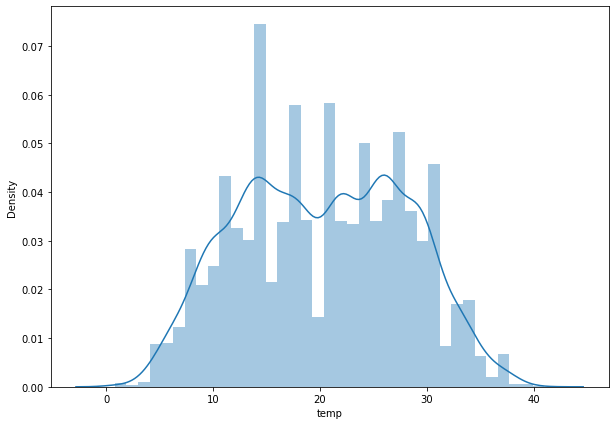

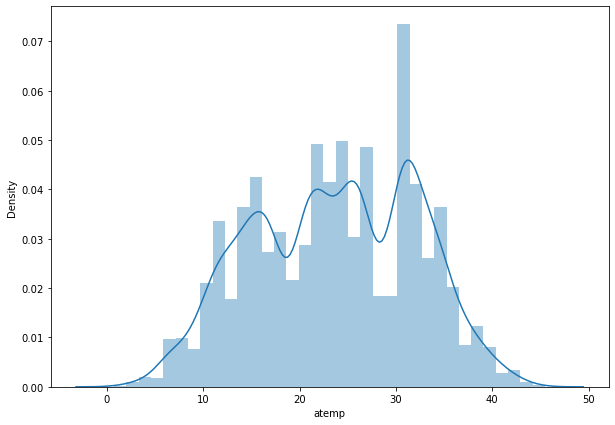

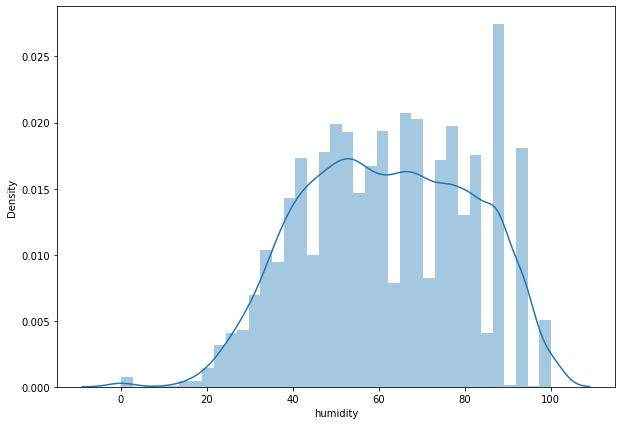

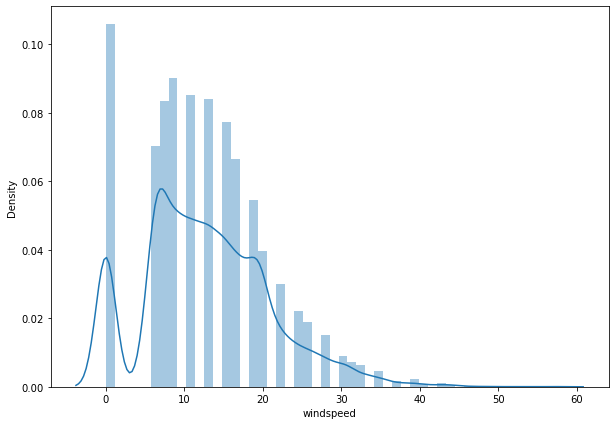

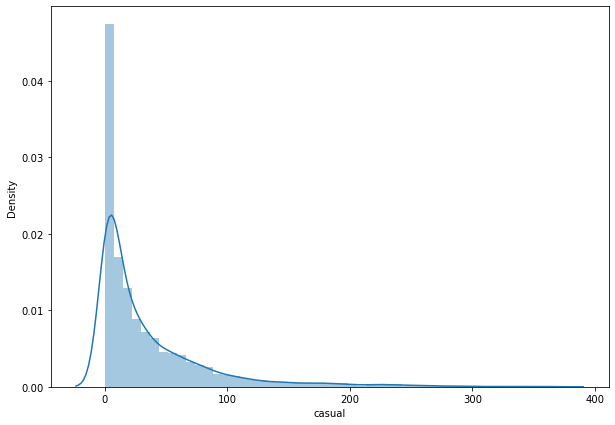

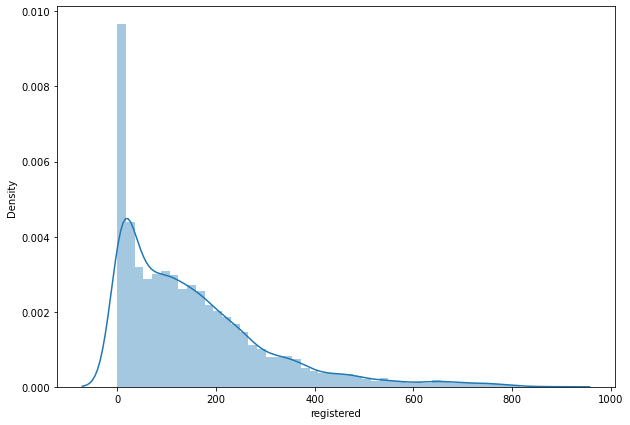

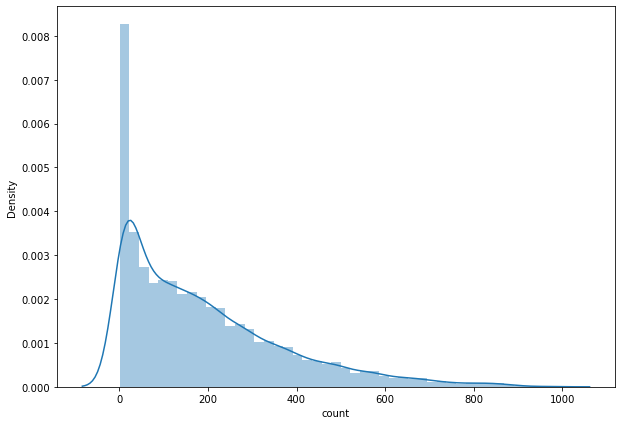

In [4]:
for feature in list(df.columns)[4:]:
    sns.distplot(df[feature])
    plt.show()
    

## 4.
Getting for each feature: 1) mean; 2) dispersion; 3) percentiles – 50%, 75%, 99%; 4) mode. We use a special function for this.

In [5]:
def basic_stat(df, feature):
    print(feature)
    print('----- Mean and dispersion -----')
    print(df[feature].mean())
    print(df[feature].std()**2)
    
    print('----- Percentiles -----')
    print(np.percentile(df[feature], 50))
    print(np.percentile(df[feature], 75))
    print(np.percentile(df[feature], 99))
    
    print('----- Mode -----')
    print(df[feature].value_counts().nlargest(1))
    print('----------------')
    print()

In [6]:
for feature in list(df.columns)[4:]:
    basic_stat(df, feature)

temp
----- Mean and dispersion -----
20.230859819952173
60.70887229692924
----- Percentiles -----
20.5
26.24
36.08
----- Mode -----
14.76    467
Name: temp, dtype: int64
----------------

atemp
----- Mean and dispersion -----
23.65508405291192
71.81885577841805
----- Percentiles -----
24.24
31.06
40.15
----- Mode -----
31.06    671
Name: atemp, dtype: int64
----------------

humidity
----- Mean and dispersion -----
61.88645967297446
370.3713058480327
----- Percentiles -----
62.0
77.0
100.0
----- Mode -----
88    368
Name: humidity, dtype: int64
----------------

windspeed
----- Mean and dispersion -----
12.799395406945093
66.65966976133899
----- Percentiles -----
12.998
16.9979
35.0008
----- Mode -----
0.0    1313
Name: windspeed, dtype: int64
----------------

casual
----- Mean and dispersion -----
36.02195480433584
2496.04921936629
----- Percentiles -----
17.0
49.0
240.14999999999964
----- Mode -----
0    986
Name: casual, dtype: int64
----------------

registered
----- Mean and disp

## 5.
Getting for each feature kurtosis and skew.

In [7]:
def kurt_skew(df, feature):
    print(feature)
    print('----- Kurtosis -----')
    print(kurtosis(df[feature]))
    print('----- Skew -----')
    print(skew(df[feature]))
    print('----------')
    print()

In [8]:
for feature in list(df.columns)[4:]:
    kurt_skew(df, feature)

temp
----- Kurtosis -----
-0.9146613849825282
----- Skew -----
0.0036903358354289715
----------

atemp
----- Kurtosis -----
-0.8502363689497141
----- Skew -----
-0.10254538108264065
----------

humidity
----- Kurtosis -----
-0.760019710012902
----- Skew -----
-0.0863232869219358
----------

windspeed
----- Kurtosis -----
0.629292367034056
----- Skew -----
0.5886853963635482
----------

casual
----- Kurtosis -----
7.547610130561701
----- Skew -----
2.495404491505502
----------

registered
----- Kurtosis -----
2.6243238654959855
----- Skew -----
1.5245944734221468
----------

count
----- Kurtosis -----
1.2989447727380323
----- Skew -----
1.241895058803035
----------



## 6.
Building symmetric confidence interval for the feature with the largest dispersion (with probability 0.95).

<AxesSubplot:>

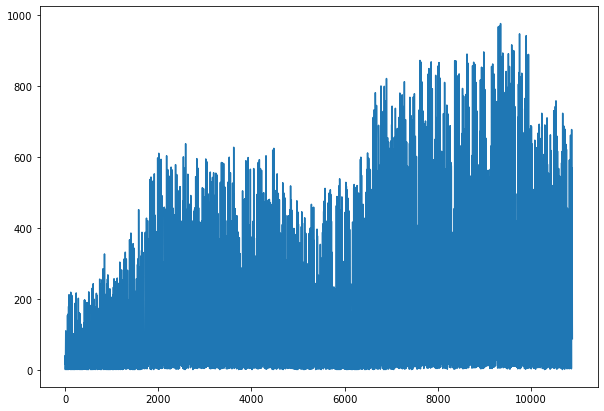

In [9]:
df['count'].plot()

In [10]:
def my_norm_confidence(df=df, column = "count", alpha = 0.95):
    interval = stats.norm.interval(alpha, loc=df[column].mean(), scale=df[column].std())
    return interval

In [11]:
confidence = my_norm_confidence()
print(confidence)

(-163.46247359398893, 546.6107374190854)


Text(0.5, 1.0, 'Доверительный интервал')

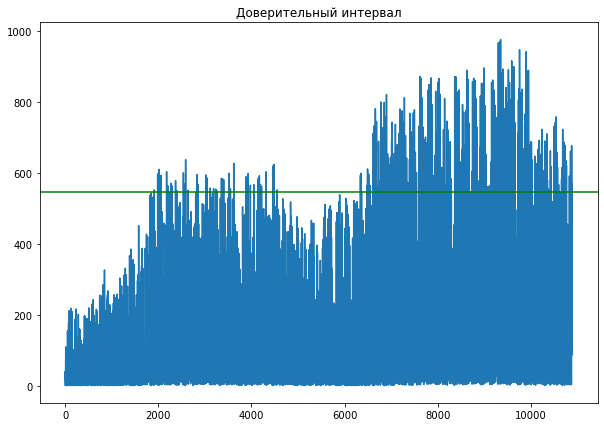

In [12]:
df['count'].plot()
plt.axhline(y=confidence[1], color="g", linestyle="-")
plt.title("Доверительный интервал")

## 7.
Getting amount of values out of the three sigmas for each feature.

In [13]:
def find_anomaly(df, column):
    upper_level = df[column].mean() + 3*df[column].std()
    lower_level = df[column].mean() - 3*df[column].std()
    anomaly = df[(df[column] >= upper_level)^(df[column] <= lower_level)]
    return anomaly, upper_level, lower_level

0.0


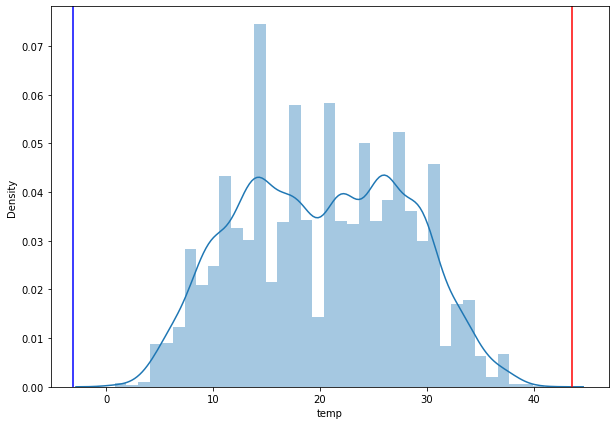

0.0


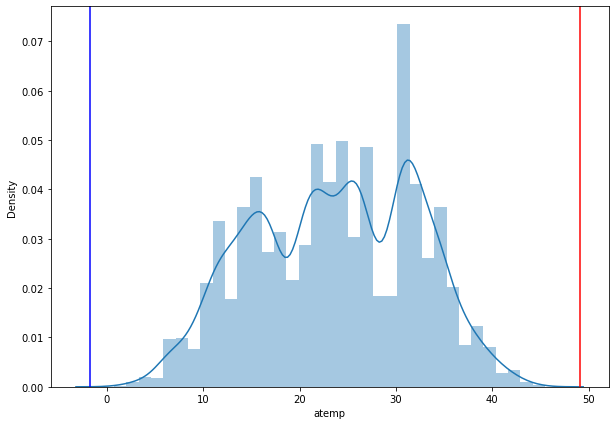

0.2


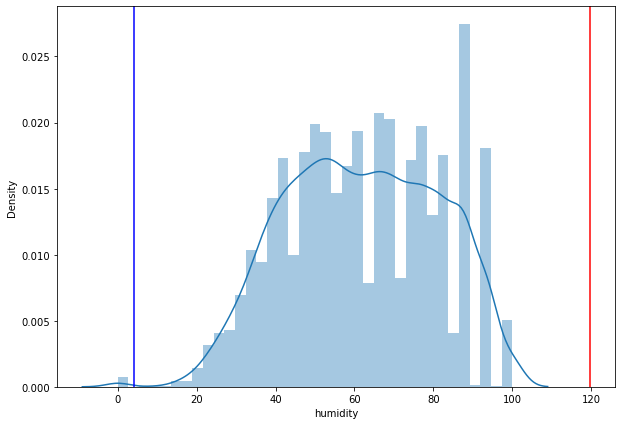

0.62


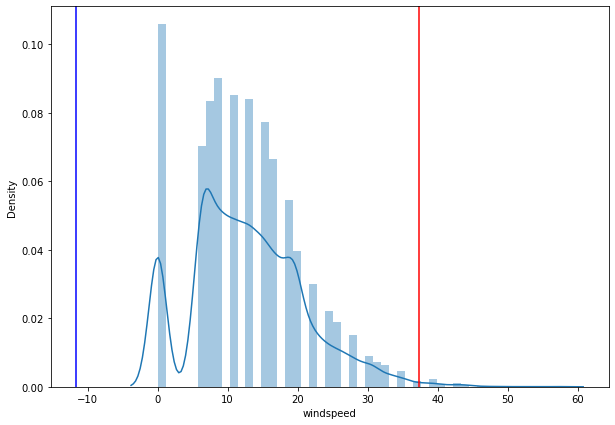

2.68


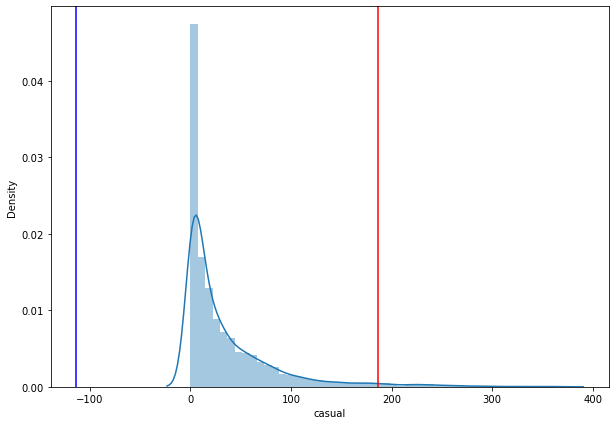

2.16


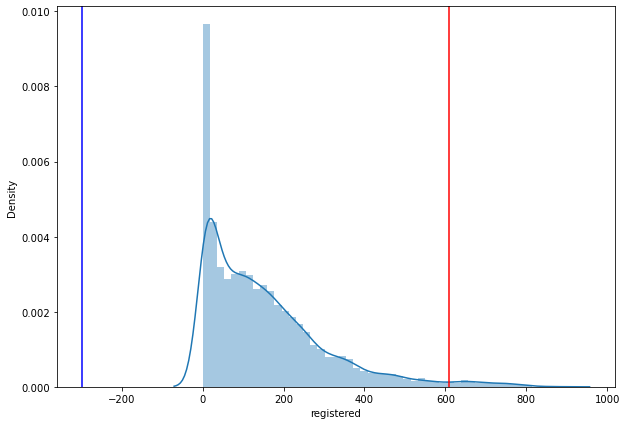

1.35


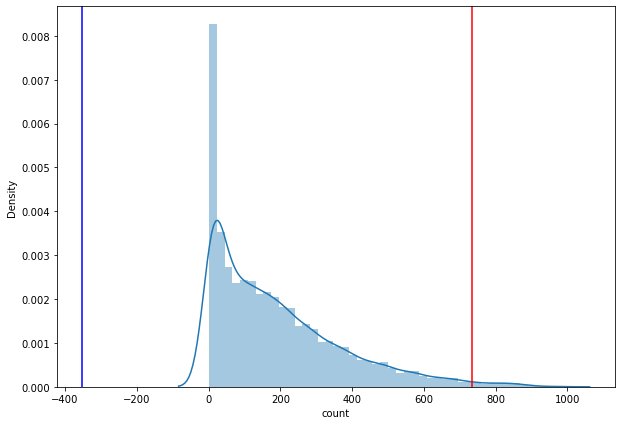

In [14]:
for feature in list(df.columns)[4:]:
    anomaly = find_anomaly(df=df, column = feature)
    print(round((len(anomaly[0])/len(df))*100, 2))
    sns.distplot(df[feature])
    plt.axvline(x=anomaly[1], color="r", linestyle="-")
    plt.axvline(x=anomaly[2], color="b", linestyle="-")
    plt.show()
    anomaly[0]

## 8.
Building correlation matrix and heatmap for dataset features.

In [15]:
df.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


<AxesSubplot:>

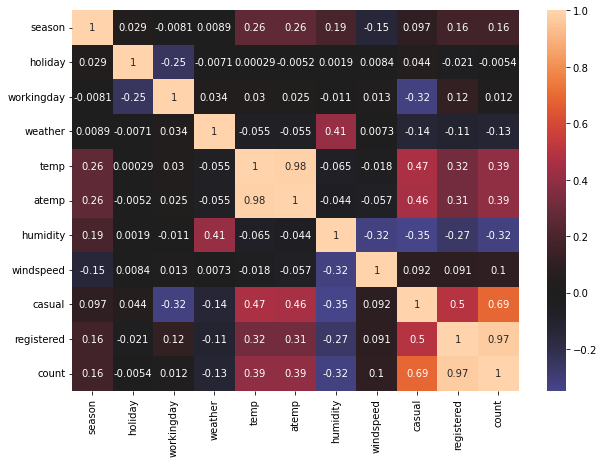

In [16]:
sns.heatmap(df.corr(), center=0, annot=True)

<AxesSubplot:xlabel='count', ylabel='Density'>

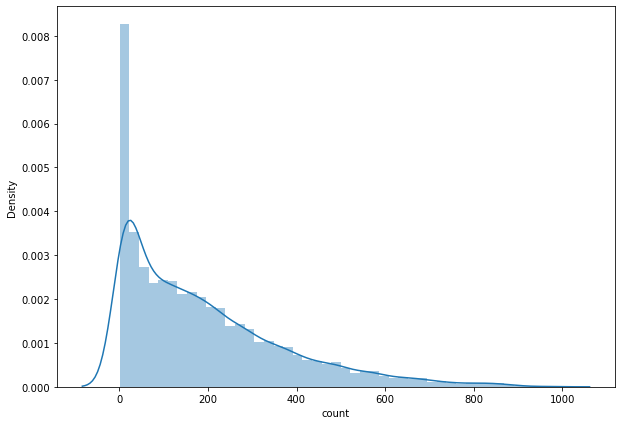

In [17]:
sns.distplot(df['count'])

<AxesSubplot:xlabel='count', ylabel='Density'>

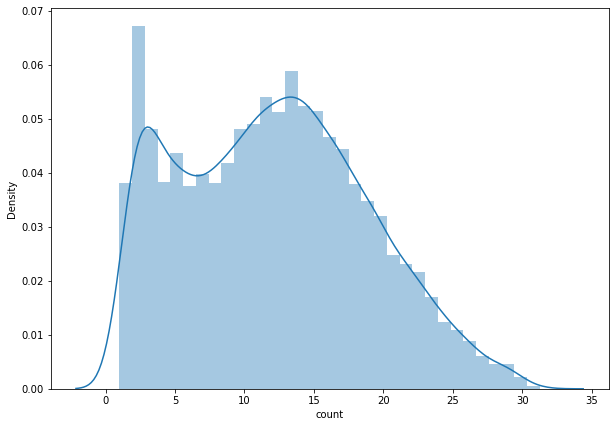

In [18]:
new_data_1 = df['count']**0.5
sns.distplot(new_data_1)

<AxesSubplot:xlabel='count', ylabel='Density'>

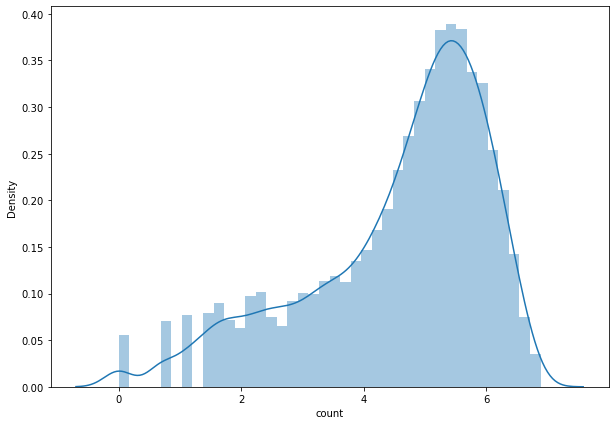

In [19]:
new_data_2 = np.log(df['count'])
sns.distplot(new_data_2)

In [20]:
from scipy.stats import kstest
kstest(new_data_1, 'norm')

KstestResult(statistic=0.9422507866628809, pvalue=0.0)

In [21]:
kstest(new_data_2, 'norm')

KstestResult(statistic=0.8992033349835633, pvalue=0.0)